In [2]:
import pandas as pd
import string
import re
from collections import Counter

In [133]:
# List of common English stopwords
stop_words = set([
    'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 
    'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
    'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now', 'ltgt', 'txt'
])

stop_words.update({'call', 'upon', 'still', 'nevertheless', 'down', 'every', 'forty', '‘re', 'always', 'whole', 'side', "n't", 'now', 'however', 
                   'an', 'show', 'least', 'give', 'below', 'did', 'sometimes', 'which', "'s", 'nowhere', 'per', 'hereupon', 'yours', 'she', 'moreover', 
                   'eight', 'somewhere', 'within', 'whereby', 'few', 'has', 'so', 'have', 'for', 'noone', 'top', 'were', 'those', 'thence', 'eleven', 'after', 
                   'no', '’ll', 'others', 'ourselves', 'themselves', 'though', 'that', 'nor', 'just', '’s', 'before', 'had', 'toward', 'another', 'should', 
                   'herself', 'and', 'these', 'such', 'elsewhere', 'further', 'next', 'indeed', 'bottom', 'anyone', 'his', 'each', 'then', 'both', 'became', 
                   'third', 'whom', '‘ve', 'mine', 'take', 'many', 'anywhere', 'to', 'well', 'thereafter', 'besides', 'almost', 'front', 'fifteen', 'towards', 
                   'none', 'be', 'herein', 'two', 'using', 'whatever', 'please', 'perhaps', 'full', 'ca', 'we', 'latterly', 'here', 'therefore', 'us', 'how', 'was', 
                   'made', 'the', 'or', 'may', '’re', 'namely', "'ve", 'anyway', 'amongst', 'used', 'ever', 'of', 'there', 'than', 'why', 'really', 'whither', 'in', 
                   'only', 'wherein', 'last', 'under', 'own', 'therein', 'go', 'seems', '‘m', 'wherever', 'either', 'someone', 'up', 'doing', 'on', 'rather', 'ours', 
                   'again', 'same', 'over', '‘s', 'latter', 'during', 'done', "'re", 'put', "'m", 'much', 'neither', 'among', 'seemed', 'into', 'once', 'my', 'otherwise', 
                   'part', 'everywhere', 'never', 'myself', 'must', 'will', 'am', 'can', 'else', 'although', 'as', 'beyond', 'are', 'too', 'becomes', 'does', 'a', 'everyone', 
                   'but', 'some', 'regarding', '‘ll', 'against', 'throughout', 'yourselves', 'him', "'d", 'it', 'himself', 'whether', 'move', '’m', 'hereafter', 're', 'while', 
                   'whoever', 'your', 'first', 'amount', 'twelve', 'serious', 'other', 'any', 'off', 'seeming', 'four', 'itself', 'nothing', 'beforehand', 'make', 'out', 'very', 
                   'already', 'various', 'until', 'hers', 'they', 'not', 'them', 'where', 'would', 'since', 'everything', 'at', 'together', 'yet', 'more', 'six', 'back', 'with', 
                   'thereupon', 'becoming', 'around', 'due', 'keep', 'somehow', 'n‘t', 'across', 'all', 'when', 'i', 'empty', 'nine', 'five', 'get', 'see', 'been', 'name', 
                   'between', 'hence', 'ten', 'several', 'from', 'whereupon', 'through', 'hereby', "'ll", 'alone', 'something', 'formerly', 'without', 'above', 'onto', 'except',
                    'enough', 'become', 'behind', '’d', 'its', 'most', 'n’t', 'might', 'whereas', 'anything', 'if', 'her', 'via', 'fifty', 'is', 'thereby', 'twenty', 'often', 
                    'whereafter', 'their', 'also', 'anyhow', 'cannot', 'our', 'could', 'because', 'who', 'beside', 'by', 'whence', 'being', 'meanwhile', 'this', 'afterwards', 
                    'whenever', 'mostly', 'what', 'one', 'nobody', 'seem', 'less', 'do', '‘d', 'say', 'thus', 'unless', 'along', 'yourself', 'former', 'thru', 'he', 'hundred', 
                    'three', 'sixty', 'me', 'sometime', 'whose', 'you', 'quite', '’ve', 'about', 'even'})

# Function to preprocess each email message
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regex
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # remove non-character items
    text = re.sub('[^a-zA-Z ]', '', text)
    
    # Tokenize text by splitting by whitespace
    words = text.split()
    
    # Remove stopwords and words with 1 or 2 characters
    filtered_words = [word for word in words if (word not in stop_words) and len(word) > 2]
    
    # join filtered words into a cleaned message
    cleaned_message = ' '.join(filtered_words)

    return cleaned_message

# Read the CSV file into a DataFrame
df = pd.read_csv('spam.csv', encoding='latin-1')

# rename columns
df.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)

# add boolean spam column
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})

# Apply the preprocessing to the 'v2' column (email messages) and create a new column with tokenized words
df['tokens'] = df['message'].apply(preprocess_text)

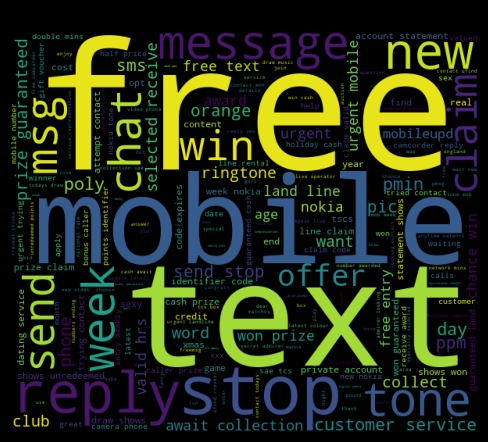

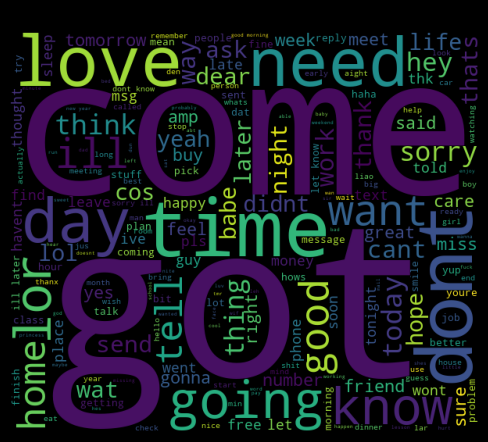

In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(df[df['label'] == 1]['tokens'])
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)
plt.figure(figsize = (8, 4), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Spam')
plt.show()

spam_words = ' '.join(df[df['label'] == 0]['tokens'])
spam_wc = WordCloud(width = 600,height = 512).generate(spam_words)
plt.figure(figsize = (8, 4), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Ham')
plt.show()

In [134]:
all_spam_words = [word for tokens in df[df['label'] == 1]['tokens'].apply(lambda token: token.split()) for word in tokens]
all_ham_words = [word for tokens in df[df['label'] == 0]['tokens'].apply(lambda token: token.split()) for word in tokens]
spam_freq = Counter(all_spam_words)
ham_freq = Counter(all_ham_words)
most_common_spam = [word for word, _ in spam_freq.most_common(20)]
most_common_ham = [word for word, _ in ham_freq.most_common(20)]
print(most_common_spam)
print(most_common_ham)

for word in most_common_spam:
    df[f'spam_{word}'] = df['tokens'].apply(lambda tokens: 1 if word in tokens else 0)
for word in most_common_ham:
    df[f'ham_{word}'] = df['tokens'].apply(lambda tokens: 1 if word in tokens else 0)


#words = ['won', 'win', 'get', 'claim', 'prize', 'cash', 'deal', 'offer', 'earn', 'collect', 'award', 
#              'free', 'credit', 'dating', 'guaranteed',
#              'reply', 'call', 'text', 'click', 'fast', 'quickly', 'urgent', 'please']

#for word in words:
#    df[f'{word}'] = df['tokens'].apply(lambda token: 1 if re.match(word, token) else 0)

df = df.drop(columns=['labels', 'tokens', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

df.columns

['free', 'mobile', 'text', 'stop', 'claim', 'reply', 'prize', 'won', 'nokia', 'new', 'send', 'urgent', 'cash', 'win', 'contact', 'service', 'week', 'guaranteed', 'customer', 'tone']
['dont', 'ill', 'got', 'know', 'like', 'come', 'good', 'day', 'time', 'love', 'going', 'want', 'home', 'lor', 'need', 'sorry', 'later', 'think', 'today', 'send']


Index(['message', 'label', 'spam_free', 'spam_mobile', 'spam_text',
       'spam_stop', 'spam_claim', 'spam_reply', 'spam_prize', 'spam_won',
       'spam_nokia', 'spam_new', 'spam_send', 'spam_urgent', 'spam_cash',
       'spam_win', 'spam_contact', 'spam_service', 'spam_week',
       'spam_guaranteed', 'spam_customer', 'spam_tone', 'ham_dont', 'ham_ill',
       'ham_got', 'ham_know', 'ham_like', 'ham_come', 'ham_good', 'ham_day',
       'ham_time', 'ham_love', 'ham_going', 'ham_want', 'ham_home', 'ham_lor',
       'ham_need', 'ham_sorry', 'ham_later', 'ham_think', 'ham_today',
       'ham_send'],
      dtype='object')

In [127]:
df.describe()

,label,won,win,get,claim,prize,cash,deal,offer,earn,...,dating,guaranteed,reply,call,text,click,fast,quickly,urgent,please
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.0,5572.000000,5572.0,5572.0,5572.0,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.0,5572.000000,5572.0,5572.000000,5572.000000
mean,0.134063,0.007538,0.004307,0.002513,0.000359,0.0,0.001436,0.0,0.0,0.0,...,0.000538,0.000718,0.000718,0.002154,0.001795,0.0,0.000179,0.0,0.009871,0.000179
std,0.340751,0.086500,0.065494,0.050067,0.018944,0.0,0.037867,0.0,0.0,0.0,...,0.023199,0.026786,0.026786,0.046361,0.042330,0.0,0.013397,0.0,0.098869,0.013397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


In [135]:
df.head(20)

,message,label,spam_free,spam_mobile,spam_text,spam_stop,spam_claim,spam_reply,spam_prize,spam_won,...,ham_going,ham_want,ham_home,ham_lor,ham_need,ham_sorry,ham_later,ham_think,ham_today,ham_send
0,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,FreeMsg Hey there darling it's been 3 week's n...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Even my brother is not like to speak with me. ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,As per your request 'Melle Melle (Oru Minnamin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,WINNER!! As a valued network customer you have...,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Had your mobile 11 months or more? U R entitle...,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df.to_csv('Spam_BagOfWord.csv', index=False)